Epoch 1/3
625/625 [==============================] - 365s 580ms/step - loss: 0.4488 - accuracy: 0.7889 - val_loss: 0.3146 - val_accuracy: 0.8800
Epoch 2/3
625/625 [==============================] - 363s 581ms/step - loss: 0.2122 - accuracy: 0.9194 - val_loss: 0.2568 - val_accuracy: 0.8968
Epoch 3/3
625/625 [==============================] - 362s 579ms/step - loss: 0.1304 - accuracy: 0.9556 - val_loss: 0.2948 - val_accuracy: 0.8920
Test Loss: 0.2948223650455475
Test Accuracy: 0.8920000195503235
Epoch 1/3
625/625 [==============================] - 363s 581ms/step - loss: 0.0849 - accuracy: 0.9722 - val_loss: 0.3462 - val_accuracy: 0.8806
Epoch 2/3
625/625 [==============================] - 359s 575ms/step - loss: 0.0772 - accuracy: 0.9739 - val_loss: 0.3948 - val_accuracy: 0.8772
Epoch 3/3
625/625 [==============================] - 360s 576ms/step - loss: 0.0726 - accuracy: 0.9747 - val_loss: 0.4717 - val_accuracy: 0.8648


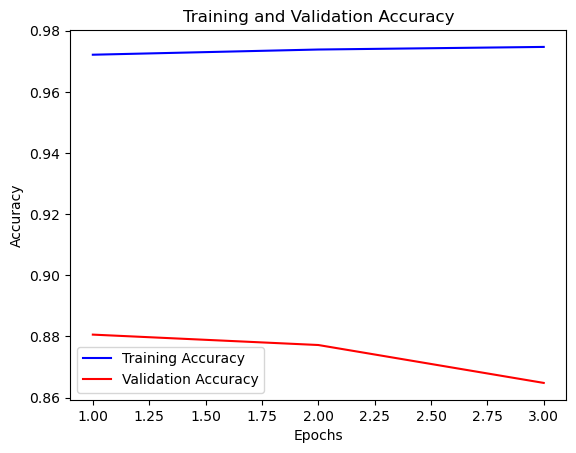

In [10]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('/kaggle/input/imdbdatasetcsv/IMDBDataset.csv')

# Extract the review text and sentiment label columns
reviews = data['review'].values
labels = data['sentiment'].values

# Convert labels to numerical values
label_mapping = {'positive': 1, 'negative': 0}
labels = np.array([label_mapping[label] for label in labels])

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

# Set the maximum sequence length
max_sequence_length = 500

# Pad sequences to a fixed length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)

# Set the vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Create the LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

# Get the training and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a line plot for training and validation accuracy
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Accuracy: 0.8468
Accuracy: 0.8495
Accuracy: 0.8488
Accuracy: 0.8469
Accuracy: 0.8459


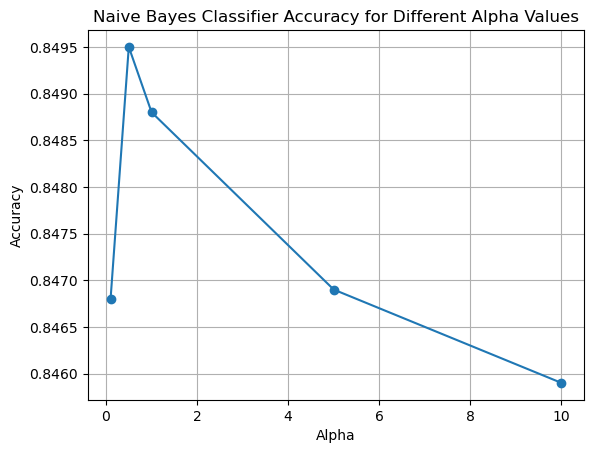

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# Load the IMDb dataset
data = pd.read_csv('/kaggle/input/imdbdatasetcsv/IMDBDataset.csv')

# Split the dataset into text reviews and corresponding labels
reviews = data['review']
labels = data['sentiment']

# Split the dataset into training and testing sets
reviews_train, reviews_test, labels_train, labels_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

# Convert text reviews into numerical features using bag-of-words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(reviews_train)
X_test = vectorizer.transform(reviews_test)

# Initialize the list of alpha values
alpha_values = [0.1, 0.5, 1, 5, 10]

# Initialize an empty list to store accuracy scores
accuracy_scores = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Initialize the Naive Bayes classifier with the current alpha value
    clf = MultinomialNB(alpha=alpha)

    # Train the classifier
    clf.fit(X_train, labels_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the classifier
    accuracy = (y_pred == labels_test).mean()

    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)
    print(f"Accuracy: {accuracy}")
# Plot the graph
plt.plot(alpha_values, accuracy_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Classifier Accuracy for Different Alpha Values')
plt.grid(True)
plt.show()